In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print ("Tensor version:",tf.__version__);
import tensorflow_hub as hub
print ("tensorflowhub:",hub.__version__);

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensor version: 2.10.0
tensorflowhub: 0.12.0


In [4]:
import matplotlib.pyplot as plt

### Data Exploration

In [3]:
import pandas as pd
labels_csv = pd.read_csv("labels.csv")
labels_csv.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [5]:
labels_csv.isnull().sum()

id       0
breed    0
dtype: int64

In [6]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

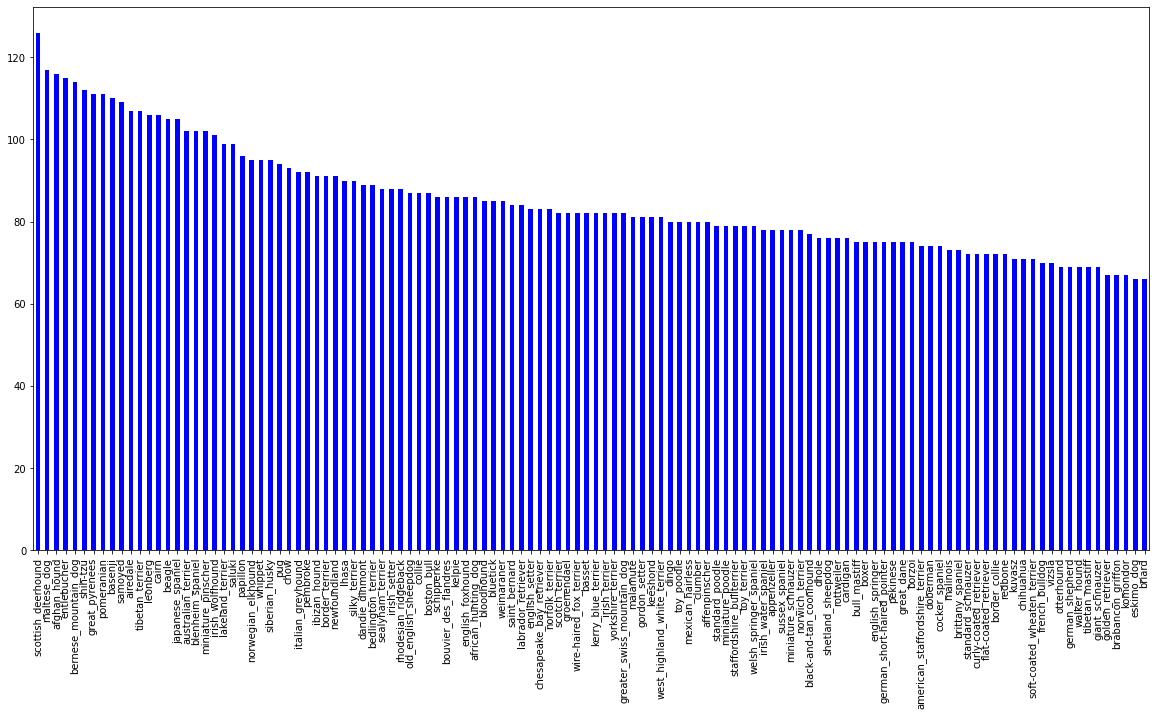

In [7]:
plt.style.use('seaborn-dark-palette')
fig, ax = plt.subplots(figsize = (20,10))
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10), ax=ax,cmap="winter");

In [8]:
#plt.style.available

<h6>Making Our Image Path to access. </h6>

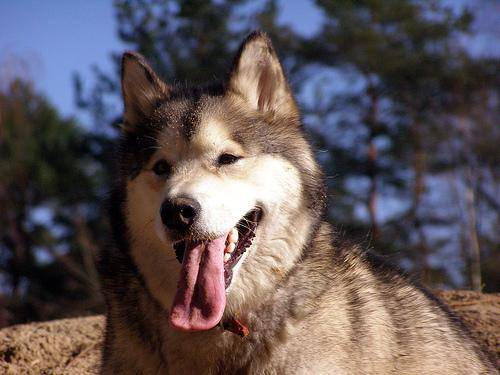

In [9]:
#Ipython - Interactive python
from IPython.display import Image
Image("C:\\Users\\Admin\\info\\train\\ed1957de19321d3f09348c0c1e3321a8.jpg")

In [10]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [11]:
pathname = ["C:\\Users\\Admin\\info\\train\\" + pname +".jpg" for pname in labels_csv['id']]
pathname [:5]

['C:\\Users\\Admin\\info\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:\\Users\\Admin\\info\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:\\Users\\Admin\\info\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'C:\\Users\\Admin\\info\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:\\Users\\Admin\\info\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [12]:
len(pathname)

10222

In [13]:
import os
os.listdir ("C:\\Users\\Admin\\info\\train\\")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
import os
if len(os.listdir("C:\\Users\\Admin\\info\\train\\")) == len(pathname):
    print("Hurry!!, Number of files match!!!!!")
else:
    print(" Sad!!, No. of files in our pathname and train folder do not match")

Hurry!!, Number of files match!!!!!


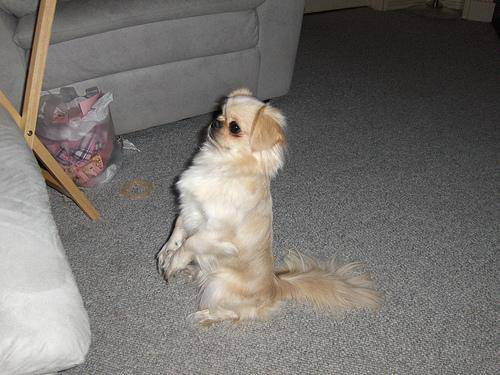

In [15]:
from IPython.display import Image
Image("C:\\Users\\Admin\\info\\train\\001cdf01b096e06d78e9e5112d419397.jpg")

In [16]:
from matplotlib import pyplot as plt
plt.imread("C:\\Users\\Admin\\info\\train\\001cdf01b096e06d78e9e5112d419397.jpg")

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]],

       [[ 99,  98,  93],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[193, 192, 188],
        [194, 193, 189],
        [195, 194, 190],
        ...,
        [118, 117, 113],
        [130, 129, 127],
        [128, 127, 123]],

       [[199, 198, 194],
        [200, 199, 195],
        [201, 200, 196],
        ...,
        [116, 115, 110],
        [107, 106, 102],
        [108, 107, 102]],

       [[199, 198, 194],
        [200, 199, 195],
        [202, 201, 197],
        ...,
        [ 96,  96,  88],
        [ 93,  92,  87],
        [107, 107,  99]]

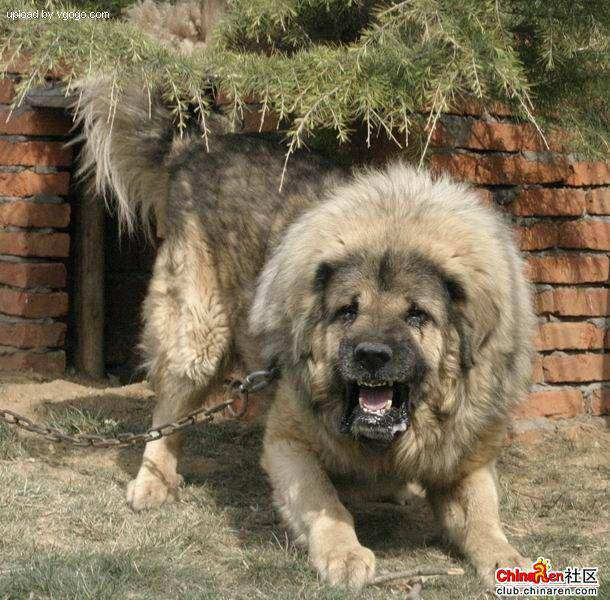

In [17]:
Image(pathname[9000])

In [18]:
labels_csv['breed'][9000]

'tibetan_mastiff'

<h6>Now, Convert our data Labels to numbers (In numerical form i.e. into tensors) i.e converting dog_breed_name into numbers</h6>

In [19]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels
#it converts our list into a numpy array(
#len(labels)

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
type(labels)

numpy.ndarray

In [21]:
len(labels)

10222

In [22]:
if len(labels) == len(pathname):
      print("No. of labels and pathname matches.")
else:
     print("No. of labels and pathname do not match.")

No. of labels and pathname matches.


In [23]:
unique_name = np.unique (labels)
unique_name

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [24]:
len(unique_name)

120

<h6>Now, we will convert unique breed name to boolean value, after that we will convert it into tensors.</h6>


In [25]:
#converting a single label to array of booleans
print(labels[0])
labels[0] == unique_name

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [26]:
labels[9000] == unique_name #tibetian_mustaff

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

<h6>Now, lets convert every label into a boolean array</h6>

In [27]:
bool_labels = [ x == unique_name for x in labels]
bool_labels [:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [28]:
len(bool_labels)

10222

In [29]:
#converting array of boolean to integer
print(labels[0])
print(np.where(unique_name == labels[0]))
print(bool_labels[0].argmax())
bool_labels[0].astype(int)

boston_bull
(array([19], dtype=int64),)
19


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
bool_labels[500].argmax()
#labels[500]
bool_labels[500].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h4>Lets create validation Set. </h4>

In [31]:
x = pathname
y = bool_labels

<h6>for validation , lets start with 1000 images and then increase gradually.

lets setup number of images by using magic funtion: </h6>

In [32]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10222, step:1}

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state = 42)

In [34]:
len(x_train), len(x_val) 

(800, 200)

<h6>Converting labels to tensors</h6>

In [35]:
#convert image to numpy array
from matplotlib.pyplot import imread
image = imread(pathname[42])
image.shape

(257, 350, 3)

In [36]:
image.max(), image.min()

(255, 0)

In [37]:
#turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [38]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

<h6>In upper step, we cam see how a image looks like in tensor form, Now, 
lets make a funtion to preprocess them </h6>

In [39]:
#lets define image size

IMG_SIZE = 224

#Create a funtion for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
    
  """
   Takes an image file path and turns the image into a Tensor.
   """
  #lets read in an image file
  image = tf.io.read_file(image_path)
 # image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg (image, channels=3)
  #convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

  #this funtion has taken a image path and image size, it reads image file from pathname,

<h2>Turn Data Into Batches.</h2>

Why turn our data into batches?

If we want to process 10,000+ images, all at once, they all might not fit into memory. So, that's why we do about 32(this is batch size)images at a time(we can adjust batch size as we want.) In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which looks like: (image, label)

In [40]:
#create a simple funtion to return a tuple (image, label)
def get_image_label(image_path, label):
  #
  """
  Take an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  #
  image = process_image(image_path)
 #
  return image, label

In [41]:
#Demo of the above
(process_image(x[42]), tf.constant (y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of Tensors in the form: (image, label), let's make a funtion to turn all of our data(x & y) into batches

In [42]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
   #
  return data_batch

In [43]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [44]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing data batches

In [45]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_name[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

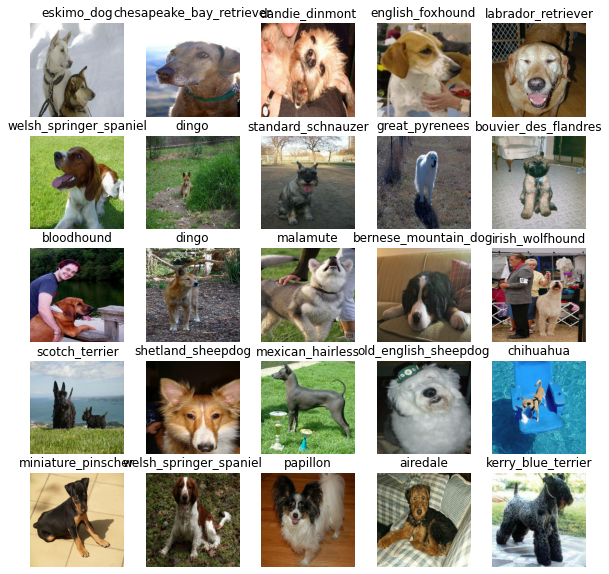

In [46]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

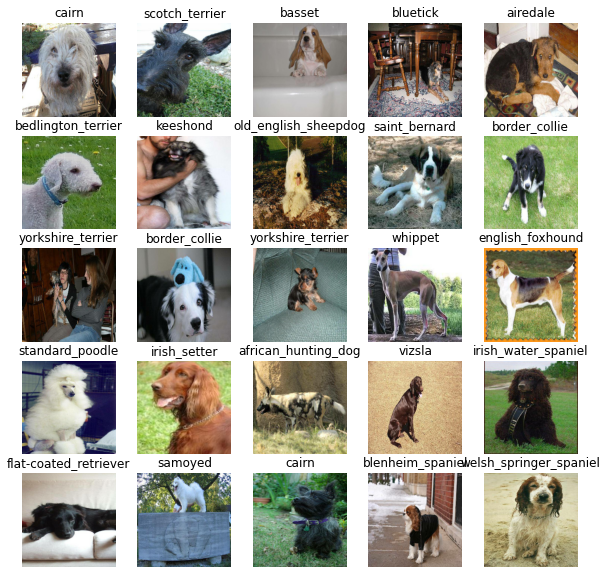

In [47]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

<h2>Finally, Our data is ready now, lets Prepare our model.</h2>

In [48]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_name) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [49]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), #  telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
 # 
  return model

In [50]:
# Create a model and check its details
model = create_model()
model.summary();

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


<h6>Creating call backs</h6>

In [66]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [67]:
import datetime

def create_tensorboard_callback():
    logdir = os.path.join("C:\\Users\\Admin\\info\\models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

<h6>Stopping Early CallBack </h6>

In [68]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

### Training a model (on a subset of data)

In [69]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 

In [70]:
# Build a function to train and return a trained model
def train_model():
    model = create_model()
    tensorboard = create_tensorboard_callback() #create new tensorboard session everytime we train a model
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1, #check validation metrics every epoch
              callbacks=[tensorboard, early_stopping])
    return model

In [71]:
# Fit the model to the data
model = train_model();

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 90s 3s/step - loss: 4.6876 - accuracy: 0.0787 - val_loss: 3.6501 - val_accuracy: 0.2100
Epoch 2/100
25/25 [==============================] - 91s 4s/step - loss: 1.6882 - accuracy: 0.6600 - val_loss: 2.2565 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 78s 3s/step - loss: 0.5684 - accuracy: 0.9463 - val_loss: 1.7341 - val_accuracy: 0.5900
Epoch 4/100
25/25 [==============================] - 83s 3s/step - loss: 0.2572 - accuracy: 0.9862 - val_loss: 1.5348 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 89s 4s/step - loss: 0.1470 - accuracy: 0.9962 - val_loss: 1.4485 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 84s 3s/step - loss: 0.1028 - accuracy: 0.9975 - val_loss: 1.3974 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 101s 4s/

In [72]:
%tensorboard --logdir C:\\Users\\Admin\\info\\models

#Now, Lets make and evaluating predictions using our trained model

In [73]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 14s 2s/step


array([[5.0148059e-04, 7.8423000e-05, 2.3163903e-04, ..., 1.1128237e-04,
        4.9016035e-05, 5.5231461e-03],
       [1.0783703e-02, 1.0485308e-03, 2.7304492e-03, ..., 8.1334909e-04,
        5.0247498e-03, 2.8684872e-04],
       [8.4451145e-05, 1.3503055e-04, 1.7615437e-04, ..., 7.0237461e-04,
        3.5951892e-04, 7.3590651e-03],
       ...,
       [5.5675873e-06, 2.3614577e-05, 2.6077629e-05, ..., 3.0512547e-06,
        1.7756292e-04, 2.7102456e-05],
       [4.0727300e-03, 2.6530915e-04, 5.6903067e-05, ..., 1.9633927e-04,
        4.9600512e-05, 6.2152520e-03],
       [6.8647292e-05, 1.2650878e-04, 3.4496671e-04, ..., 5.0541630e-04,
        3.2278479e-04, 4.3814849e-05]], dtype=float32)

In [76]:
# Check the shape of predictions
predictions.shape

(200, 120)

In [77]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_name[np.argmax(predictions[0])]}") # the predicted label

[5.01480594e-04 7.84229996e-05 2.31639031e-04 1.33548136e-04
 1.05048751e-03 1.97313475e-05 2.00319979e-02 3.51095281e-04
 9.28753696e-04 4.40627162e-04 5.99064006e-05 6.46929548e-05
 4.55882313e-04 1.79936487e-05 4.04982216e-04 2.68987642e-04
 1.22619458e-04 1.12395070e-01 1.34456059e-04 5.65554983e-05
 5.38599794e-04 1.85845172e-04 1.54370660e-04 5.89992246e-03
 3.71792612e-06 8.51465156e-05 1.09274581e-01 1.43743760e-04
 7.37271446e-04 2.98825980e-05 5.74711630e-05 1.95645657e-03
 9.43389779e-04 8.40376742e-05 4.94576998e-05 4.92469855e-02
 2.01340663e-05 2.95978534e-04 1.50215001e-05 9.14333286e-05
 9.40949831e-04 6.41572296e-06 1.79407689e-05 3.07783077e-04
 4.16992189e-05 4.42613527e-05 4.23333549e-05 2.33795799e-04
 1.35083057e-04 6.97001233e-05 2.12539919e-04 6.48070127e-05
 6.30035019e-03 8.73362005e-05 2.35039115e-05 2.70329911e-04
 2.49458884e-04 3.25128529e-03 4.04075457e-04 2.74478227e-01
 1.01282401e-03 2.89473574e-05 1.01081119e-03 6.26824767e-05
 5.84694732e-04 2.266137

In [78]:
def get_pred_label(prediction_probabilities):
    return unique_name[np.argmax(prediction_probabilities)]
pred_label = get_pred_label(predictions[0])

In [79]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
#
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
#
  images = []
#
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_name[np.argmax(label)])
#
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [80]:
def plot_pred(prediction_probabilities, labels, images, n=1):
#
  """
  View the prediction, ground truth label and image for sample n.
  """
#
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
#  
  # Get the pred label
#
  pred_label = get_pred_label(pred_prob)
 # 
  # Plot image & remove ticks
#
  plt.imshow(image)
#
  plt.xticks([])
#
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  #
  else:
    color = "red"
 #
  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

In [81]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    pred_label = get_pred_label(pred_prob)
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_name[top_10_pred_indexes]
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
   # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

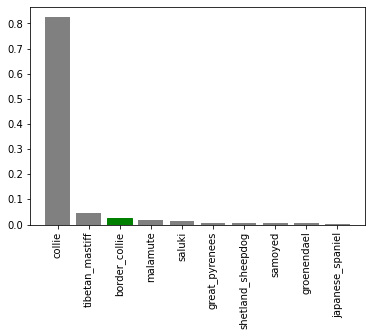

In [82]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

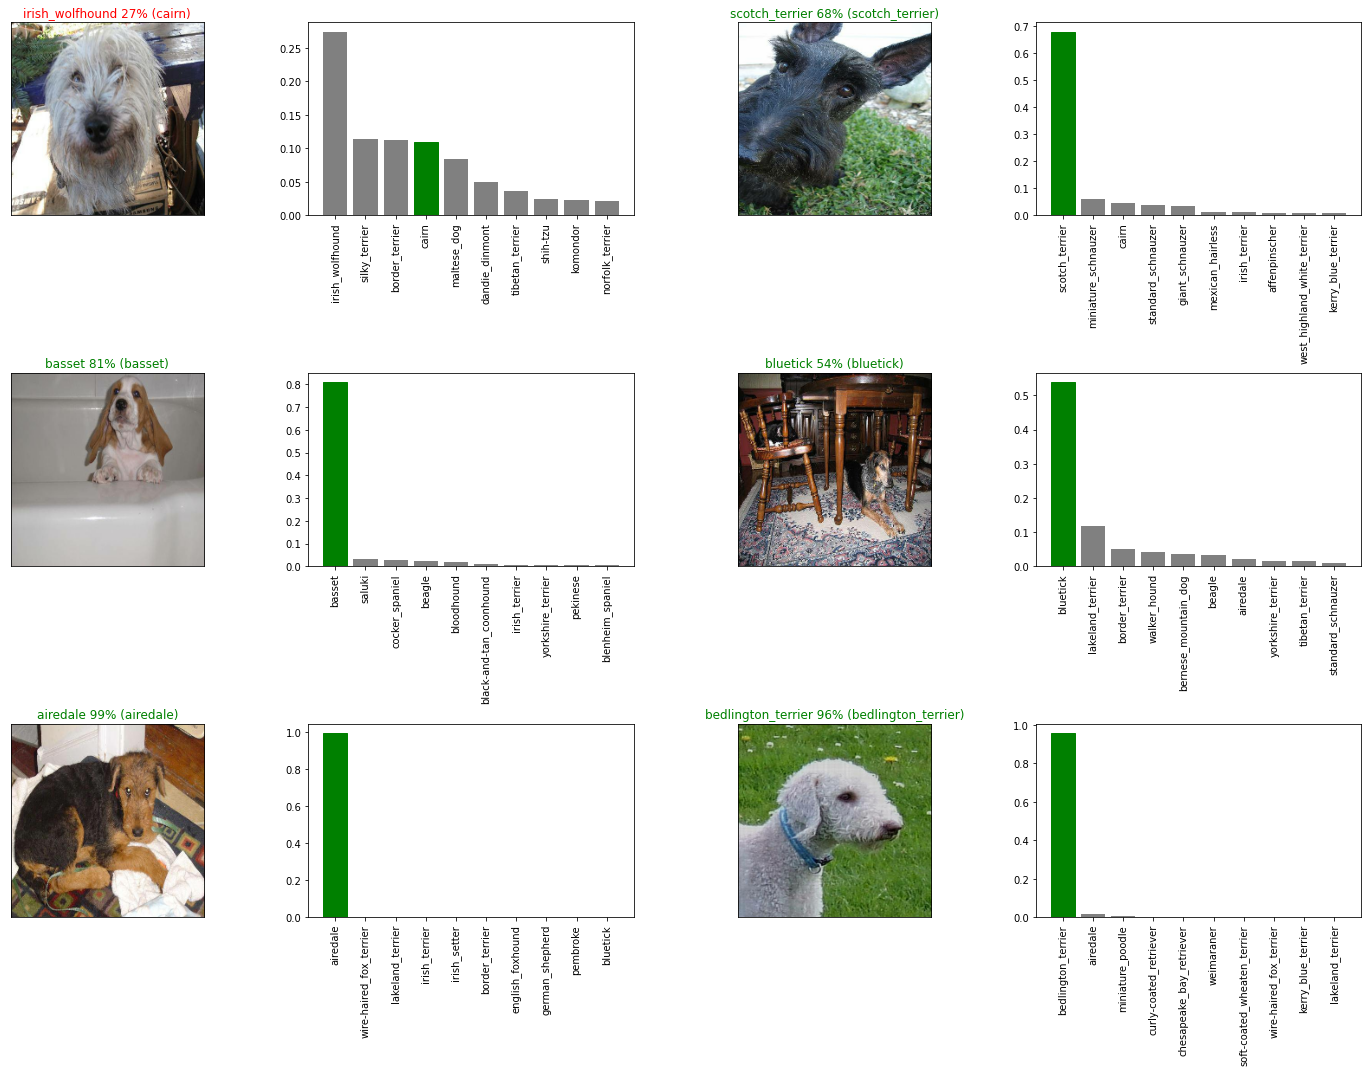

In [83]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and reloading a model

In [149]:
def save_model(model, suffix=None):
    modeldir = os.path.join("C:\\Users\\Admin\\info\\logs", 
                            datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))  
    model_path = modeldir + '-' + suffix + '.h5'
    print(f"saving model to:{model_path}....")
    model.save(model_path)
    return model_path

In [170]:
def load_model(model_path):
    print(f"Loading a saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer":hub.KerasLayer})
    print(f"Model has been loaded.")
    return model

In [171]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

saving model to:C:\Users\Admin\info\logs\20221111/04/22-101126-1000-images-Adam.h5....


'C:\\Users\\Admin\\info\\logs\\20221111/04/22-101126-1000-images-Adam.h5'

In [152]:
# Load our model trained on 1000 images
model_1000_images = load_model('C:\\Users\\Admin\\info\\logs\\20224511/04/22-094517-1000-images-Adam.h5')

Loading saved model from: C:\Users\Admin\info\logs\20224511/04/22-094517-1000-images-Adam.h5


In [117]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 11s 1s/step - loss: 1.2415 - accuracy: 0.6800


[1.2414758205413818, 0.6800000071525574]

In [153]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 11s 1s/step - loss: 1.2415 - accuracy: 0.6800


[1.2414758205413818, 0.6800000071525574]

### Training a model (on the full data)

In [119]:
# Turn full training data in a data batch
full_data = create_data_batches(x, y)

Creating training data batches...


In [120]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [121]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [122]:
%tensorboard --logdir C:\Users\Admin\info\models

Reusing TensorBoard on port 6006 (pid 12640), started 21:24:53 ago. (Use '!kill 12640' to kill it.)

In [123]:
# Fit the full model to the full training data
"""
 model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1, #check validation metrics every epoch
              callbacks=[tensorboard, early_stopping])
"""
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 635s 2s/step - loss: 1.3300 - accuracy: 0.6686
Epoch 2/100
320/320 [==============================] - 637s 2s/step - loss: 0.4000 - accuracy: 0.8809
Epoch 3/100
320/320 [==============================] - 639s 2s/step - loss: 0.2348 - accuracy: 0.9374
Epoch 4/100
320/320 [==============================] - 646s 2s/step - loss: 0.1541 - accuracy: 0.9629
Epoch 5/100
320/320 [==============================] - 666s 2s/step - loss: 0.1067 - accuracy: 0.9789
Epoch 6/100
320/320 [==============================] - 697s 2s/step - loss: 0.0783 - accuracy: 0.9859
Epoch 7/100
320/320 [==============================] - 673s 2s/step - loss: 0.0582 - accuracy: 0.9913
Epoch 8/100
320/320 [==============================] - 671s 2s/step - loss: 0.0466 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 788s 2s/step - loss: 0.0374 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 716s 2s/step - loss: 0.029

In [124]:
%tensorboard --logdir C:\Users\Admin\info\models

Reusing TensorBoard on port 6006 (pid 12640), started 1 day, 0:55:37 ago. (Use '!kill 12640' to kill it.)

### Saving and reloading the full model

In [172]:
# Save model to file
#C:\\Users\\Admin\\info\\logs\\20224511/04/22-094517-1000-images-Adam.h5
save_model(full_model, suffix="all-images-Adam")

saving model to:C:\Users\Admin\info\logs\20221211/04/22-101201-all-images-Adam.h5....


'C:\\Users\\Admin\\info\\logs\\20221211/04/22-101201-all-images-Adam.h5'

In [2]:
# Load in the full model
loaded_full_model = load_model('C:\\Users\\Admin\\info\\logs\\20221211/04/22-101201-all-images-Adam.h5')

NameError: name 'load_model' is not defined

### Making predictions on the test dataset

In [175]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "C:\\Users\\Admin\\info\\test\\"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['C:\\Users\\Admin\\info\\test\\000621fb3cbb32d8935728e48679680e.jpg',
 'C:\\Users\\Admin\\info\\test\\00102ee9d8eb90812350685311fe5890.jpg',
 'C:\\Users\\Admin\\info\\test\\0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:\\Users\\Admin\\info\\test\\001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:\\Users\\Admin\\info\\test\\001a5f3114548acdefa3d4da05474c2e.jpg',
 'C:\\Users\\Admin\\info\\test\\00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C:\\Users\\Admin\\info\\test\\002c2a3117c2193b4d26400ce431eebd.jpg',
 'C:\\Users\\Admin\\info\\test\\002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C:\\Users\\Admin\\info\\test\\002f80396f1e3db687c5932d7978b196.jpg',
 'C:\\Users\\Admin\\info\\test\\0036c6bcec6031be9e62a257b1c3c442.jpg']

In [176]:
# How many test images are there?
len(test_filenames)

10357

In [177]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)
test_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [1]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

NameError: name 'loaded_full_model' is not defined

In [287]:
%tensorboard --logdir C:\Users\Admin\info\models

Reusing TensorBoard on port 6006 (pid 12640), started 1 day, 12:56:21 ago. (Use '!kill 12640' to kill it.)

In [179]:
# Check out the test predictions
test_predictions[:10]

array([[1.9310562e-12, 3.5833069e-13, 1.5350778e-15, ..., 7.2924709e-16,
        3.0726706e-11, 1.8539502e-12],
       [3.0134804e-06, 1.4615049e-06, 5.0543211e-08, ..., 5.4957164e-11,
        1.3838643e-07, 1.5622766e-09],
       [1.4901060e-10, 9.2372471e-07, 1.2820489e-08, ..., 1.6958226e-07,
        9.4892476e-11, 2.3621427e-10],
       ...,
       [1.9917483e-09, 5.5594383e-11, 6.1063495e-11, ..., 8.0136651e-13,
        1.2022709e-12, 2.9988290e-11],
       [8.0039803e-12, 1.7127992e-10, 2.0894900e-11, ..., 1.7372744e-07,
        1.9862463e-09, 2.8797271e-12],
       [5.0971787e-09, 1.3465961e-11, 6.6277234e-11, ..., 1.6759738e-12,
        2.9929136e-12, 2.3314541e-07]], dtype=float32)

In [180]:
### Preparing test dataset

In [182]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_name))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [286]:
# Append test image ID's to predictions DataFrame
test_path = "C:\\Users\\Admin\\info\\test"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
#preds_df.head()

In [185]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_name)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,1.931056e-12,3.583307e-13,1.535078e-15,6.148966e-15,1.101466e-14,1.006006e-12,5.086498e-17,1.336967e-14,4.308009e-15,...,5.652544e-14,2.894158e-15,2.308745e-15,4.035543e-16,1.603772e-15,3.589311e-14,2.598210e-14,7.292471e-16,3.072671e-11,1.853950e-12
1,00102ee9d8eb90812350685311fe5890,3.013480e-06,1.461505e-06,5.054321e-08,6.410277e-09,1.619824e-06,1.401475e-08,1.026927e-06,8.475425e-07,3.192686e-08,...,1.540949e-08,1.837202e-07,5.541890e-09,7.512568e-06,4.330048e-08,1.659880e-07,1.515915e-04,5.495716e-11,1.383864e-07,1.562277e-09
2,0012a730dfa437f5f3613fb75efcd4ce,1.490106e-10,9.237247e-07,1.282049e-08,1.215897e-10,8.615374e-11,6.526681e-09,6.323695e-12,1.995252e-11,9.475603e-09,...,4.676945e-12,7.559574e-11,1.022114e-07,2.995308e-07,6.371057e-08,5.264602e-08,2.652879e-12,1.695823e-07,9.489248e-11,2.362143e-10
3,001510bc8570bbeee98c8d80c8a95ec1,1.239850e-05,1.023224e-06,2.055621e-07,8.572870e-07,1.686507e-05,6.570358e-07,2.516906e-10,2.072323e-09,4.474010e-09,...,3.106916e-07,5.399886e-10,5.001655e-07,1.073576e-09,1.644041e-07,6.026529e-09,1.268475e-14,1.491294e-02,2.380967e-11,1.609956e-07
4,001a5f3114548acdefa3d4da05474c2e,8.262615e-05,4.485800e-06,1.811661e-09,1.760073e-09,2.670341e-09,1.027279e-11,2.505482e-10,3.794509e-09,8.856810e-09,...,5.023700e-08,5.547682e-10,1.680735e-10,2.874115e-11,6.641556e-10,7.994012e-10,1.009766e-11,8.679756e-09,7.994225e-10,5.159093e-08


In [186]:
preds_df.to_csv("C:\\Users\\Admin\\info\\test_result\\full_submission_1_mobilienetV2_adam.csv",
                 index=False)

In [402]:
# Get custom image filepaths
custom_path = "C:\\Users\\Admin\\info\\dogs\\"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [403]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [404]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 304ms/step


In [405]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever', 'lakeland_terrier', 'german_shepherd']

In [406]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

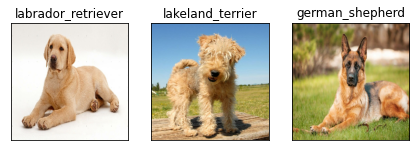

In [407]:
# Check custom image predictions
plt.figure(figsize=(50, 50))
for i, image in enumerate(custom_images):
    plt.subplot(1,20, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)

In [379]:
test_result = pd.read_csv("C:\\Users\\Admin\\info\\test_result\\result.csv")
lab = test_result.iloc[:,1:].values
lab

array([[1.9310562e-12, 3.5833070e-13, 1.5350778e-15, ..., 7.2924710e-16,
        3.0726706e-11, 1.8539502e-12],
       [3.0134804e-06, 1.4615049e-06, 5.0543210e-08, ..., 5.4957164e-11,
        1.3838643e-07, 1.5622766e-09],
       [1.4901060e-10, 9.2372470e-07, 1.2820489e-08, ..., 1.6958226e-07,
        9.4892476e-11, 2.3621427e-10],
       ...,
       [1.3307807e-08, 2.3020192e-09, 3.8196728e-07, ..., 1.3885367e-11,
        4.5612813e-07, 5.2374177e-10],
       [1.4767930e-05, 3.9031212e-07, 1.1180459e-08, ..., 6.7881730e-10,
        6.0295574e-06, 1.1566636e-05],
       [1.5352601e-08, 2.8935457e-07, 1.9493233e-07, ..., 5.6170445e-04,
        6.7172192e-09, 7.9767505e-11]])

In [395]:
#print(np.argmax(test_result[0])
our_y = []
for i in range(0,10356):
    #print(f"Sum: {np.sum(lab[i])}")
    #print(f"higest_sum: {np.argmax(lab[i])}")
    index = np.argmax(lab[i])
    print(f"breed:{unique_name[(np.argmax(lab[i]))]}")
    breed_label = unique_name[(np.argmax(lab[i]))]
    our_y.append(breed_label)
    #print(our_y)
#our_y

breed:japanese_spaniel
breed:samoyed
breed:english_setter
breed:pug
breed:tibetan_terrier
breed:toy_poodle
breed:australian_terrier
breed:samoyed
breed:irish_wolfhound
breed:sussex_spaniel
breed:tibetan_terrier
breed:sealyham_terrier
breed:newfoundland
breed:pomeranian
breed:beagle
breed:leonberg
breed:toy_terrier
breed:sealyham_terrier
breed:irish_terrier
breed:saluki
breed:scotch_terrier
breed:malamute
breed:mexican_hairless
breed:labrador_retriever
breed:irish_setter
breed:groenendael
breed:bloodhound
breed:great_dane
breed:english_setter
breed:wire-haired_fox_terrier
breed:german_shepherd
breed:great_pyrenees
breed:great_pyrenees
breed:french_bulldog
breed:brittany_spaniel
breed:shetland_sheepdog
breed:japanese_spaniel
breed:affenpinscher
breed:saint_bernard
breed:great_pyrenees
breed:standard_poodle
breed:irish_wolfhound
breed:brabancon_griffon
breed:lakeland_terrier
breed:border_collie
breed:bernese_mountain_dog
breed:blenheim_spaniel
breed:papillon
breed:toy_terrier
breed:flat-c

breed:boston_bull
breed:wire-haired_fox_terrier
breed:clumber
breed:giant_schnauzer
breed:great_dane
breed:sealyham_terrier
breed:pug
breed:maltese_dog
breed:gordon_setter
breed:border_collie
breed:pembroke
breed:vizsla
breed:malamute
breed:chesapeake_bay_retriever
breed:boston_bull
breed:irish_terrier
breed:leonberg
breed:whippet
breed:german_shepherd
breed:welsh_springer_spaniel
breed:airedale
breed:tibetan_mastiff
breed:great_pyrenees
breed:german_shepherd
breed:bluetick
breed:vizsla
breed:standard_schnauzer
breed:soft-coated_wheaten_terrier
breed:pomeranian
breed:miniature_poodle
breed:miniature_schnauzer
breed:great_dane
breed:beagle
breed:papillon
breed:giant_schnauzer
breed:staffordshire_bullterrier
breed:cairn
breed:bernese_mountain_dog
breed:newfoundland
breed:norwegian_elkhound
breed:english_foxhound
breed:samoyed
breed:sussex_spaniel
breed:welsh_springer_spaniel
breed:english_springer
breed:brabancon_griffon
breed:miniature_pinscher
breed:miniature_pinscher
breed:english_fox

breed:leonberg
breed:maltese_dog
breed:shetland_sheepdog
breed:redbone
breed:sealyham_terrier
breed:bloodhound
breed:appenzeller
breed:pembroke
breed:schipperke
breed:pug
breed:irish_wolfhound
breed:bouvier_des_flandres
breed:clumber
breed:siberian_husky
breed:flat-coated_retriever
breed:walker_hound
breed:irish_setter
breed:toy_poodle
breed:saint_bernard
breed:greater_swiss_mountain_dog
breed:chihuahua
breed:samoyed
breed:great_dane
breed:walker_hound
breed:affenpinscher
breed:irish_wolfhound
breed:komondor
breed:lakeland_terrier
breed:soft-coated_wheaten_terrier
breed:entlebucher
breed:german_short-haired_pointer
breed:staffordshire_bullterrier
breed:irish_water_spaniel
breed:irish_wolfhound
breed:irish_terrier
breed:blenheim_spaniel
breed:boston_bull
breed:bloodhound
breed:french_bulldog
breed:malinois
breed:scotch_terrier
breed:redbone
breed:standard_poodle
breed:standard_poodle
breed:border_terrier
breed:siberian_husky
breed:boxer
breed:shetland_sheepdog
breed:german_shepherd
bree

breed:brabancon_griffon
breed:cairn
breed:tibetan_mastiff
breed:afghan_hound
breed:chihuahua
breed:vizsla
breed:silky_terrier
breed:sealyham_terrier
breed:beagle
breed:japanese_spaniel
breed:samoyed
breed:german_shepherd
breed:irish_terrier
breed:west_highland_white_terrier
breed:malinois
breed:malamute
breed:chow
breed:tibetan_mastiff
breed:shih-tzu
breed:french_bulldog
breed:silky_terrier
breed:pomeranian
breed:great_dane
breed:entlebucher
breed:whippet
breed:airedale
breed:lhasa
breed:german_short-haired_pointer
breed:tibetan_terrier
breed:dhole
breed:soft-coated_wheaten_terrier
breed:kerry_blue_terrier
breed:miniature_poodle
breed:chow
breed:samoyed
breed:australian_terrier
breed:english_setter
breed:groenendael
breed:cairn
breed:boston_bull
breed:italian_greyhound
breed:papillon
breed:german_shepherd
breed:miniature_poodle
breed:dhole
breed:dandie_dinmont
breed:irish_wolfhound
breed:miniature_poodle
breed:cairn
breed:staffordshire_bullterrier
breed:curly-coated_retriever
breed:cho

breed:standard_poodle
breed:irish_wolfhound
breed:rhodesian_ridgeback
breed:weimaraner
breed:boxer
breed:bedlington_terrier
breed:papillon
breed:kerry_blue_terrier
breed:malinois
breed:keeshond
breed:greater_swiss_mountain_dog
breed:rottweiler
breed:irish_terrier
breed:clumber
breed:shih-tzu
breed:mexican_hairless
breed:norwegian_elkhound
breed:mexican_hairless
breed:borzoi
breed:whippet
breed:silky_terrier
breed:soft-coated_wheaten_terrier
breed:pug
breed:bedlington_terrier
breed:afghan_hound
breed:cardigan
breed:yorkshire_terrier
breed:norfolk_terrier
breed:italian_greyhound
breed:japanese_spaniel
breed:staffordshire_bullterrier
breed:chesapeake_bay_retriever
breed:shih-tzu
breed:dingo
breed:malamute
breed:african_hunting_dog
breed:bedlington_terrier
breed:bernese_mountain_dog
breed:lhasa
breed:kerry_blue_terrier
breed:great_pyrenees
breed:shih-tzu
breed:boxer
breed:scottish_deerhound
breed:border_terrier
breed:papillon
breed:cardigan
breed:rhodesian_ridgeback
breed:miniature_schnauz

breed:english_setter
breed:lakeland_terrier
breed:eskimo_dog
breed:maltese_dog
breed:sussex_spaniel
breed:beagle
breed:scotch_terrier
breed:old_english_sheepdog
breed:chow
breed:american_staffordshire_terrier
breed:kerry_blue_terrier
breed:boston_bull
breed:old_english_sheepdog
breed:boston_bull
breed:blenheim_spaniel
breed:kerry_blue_terrier
breed:border_terrier
breed:golden_retriever
breed:irish_terrier
breed:bull_mastiff
breed:tibetan_mastiff
breed:maltese_dog
breed:pekinese
breed:rhodesian_ridgeback
breed:sealyham_terrier
breed:pekinese
breed:miniature_pinscher
breed:dandie_dinmont
breed:entlebucher
breed:collie
breed:norfolk_terrier
breed:shetland_sheepdog
breed:mexican_hairless
breed:airedale
breed:bedlington_terrier
breed:pug
breed:otterhound
breed:ibizan_hound
breed:miniature_schnauzer
breed:toy_terrier
breed:dandie_dinmont
breed:english_setter
breed:lakeland_terrier
breed:whippet
breed:entlebucher
breed:newfoundland
breed:siberian_husky
breed:samoyed
breed:pug
breed:newfoundla

breed:standard_poodle
breed:briard
breed:german_shepherd
breed:papillon
breed:bouvier_des_flandres
breed:labrador_retriever
breed:wire-haired_fox_terrier
breed:leonberg
breed:cocker_spaniel
breed:irish_wolfhound
breed:dandie_dinmont
breed:chow
breed:afghan_hound
breed:standard_poodle
breed:great_dane
breed:weimaraner
breed:newfoundland
breed:doberman
breed:bernese_mountain_dog
breed:irish_setter
breed:vizsla
breed:scottish_deerhound
breed:greater_swiss_mountain_dog
breed:standard_poodle
breed:tibetan_mastiff
breed:rhodesian_ridgeback
breed:tibetan_terrier
breed:scotch_terrier
breed:rottweiler
breed:doberman
breed:irish_wolfhound
breed:dandie_dinmont
breed:gordon_setter
breed:cairn
breed:pekinese
breed:kelpie
breed:entlebucher
breed:yorkshire_terrier
breed:pekinese
breed:greater_swiss_mountain_dog
breed:malinois
breed:golden_retriever
breed:irish_water_spaniel
breed:clumber
breed:labrador_retriever
breed:appenzeller
breed:english_foxhound
breed:sussex_spaniel
breed:boston_bull
breed:min

breed:german_shepherd
breed:toy_terrier
breed:brabancon_griffon
breed:sussex_spaniel
breed:vizsla
breed:pembroke
breed:irish_wolfhound
breed:shih-tzu
breed:bernese_mountain_dog
breed:lakeland_terrier
breed:tibetan_terrier
breed:weimaraner
breed:mexican_hairless
breed:shih-tzu
breed:rhodesian_ridgeback
breed:miniature_schnauzer
breed:vizsla
breed:japanese_spaniel
breed:groenendael
breed:tibetan_mastiff
breed:malamute
breed:bouvier_des_flandres
breed:lakeland_terrier
breed:walker_hound
breed:wire-haired_fox_terrier
breed:brabancon_griffon
breed:english_foxhound
breed:shetland_sheepdog
breed:bernese_mountain_dog
breed:lakeland_terrier
breed:blenheim_spaniel
breed:dingo
breed:bloodhound
breed:great_pyrenees
breed:japanese_spaniel
breed:great_pyrenees
breed:leonberg
breed:chihuahua
breed:miniature_pinscher
breed:whippet
breed:beagle
breed:rottweiler
breed:chihuahua
breed:giant_schnauzer
breed:soft-coated_wheaten_terrier
breed:basset
breed:malamute
breed:miniature_poodle
breed:collie
breed:k

breed:yorkshire_terrier
breed:entlebucher
breed:entlebucher
breed:miniature_schnauzer
breed:golden_retriever
breed:bernese_mountain_dog
breed:miniature_poodle
breed:silky_terrier
breed:bull_mastiff
breed:pekinese
breed:kerry_blue_terrier
breed:american_staffordshire_terrier
breed:flat-coated_retriever
breed:bedlington_terrier
breed:komondor
breed:briard
breed:shetland_sheepdog
breed:dandie_dinmont
breed:irish_terrier
breed:scottish_deerhound
breed:japanese_spaniel
breed:pomeranian
breed:staffordshire_bullterrier
breed:flat-coated_retriever
breed:wire-haired_fox_terrier
breed:keeshond
breed:pug
breed:tibetan_mastiff
breed:pembroke
breed:pug
breed:eskimo_dog
breed:shih-tzu
breed:maltese_dog
breed:italian_greyhound
breed:sealyham_terrier
breed:rhodesian_ridgeback
breed:ibizan_hound
breed:old_english_sheepdog
breed:chow
breed:whippet
breed:old_english_sheepdog
breed:chihuahua
breed:chihuahua
breed:beagle
breed:affenpinscher
breed:west_highland_white_terrier
breed:german_shepherd
breed:newf

breed:greater_swiss_mountain_dog
breed:chihuahua
breed:schipperke
breed:malinois
breed:briard
breed:labrador_retriever
breed:irish_wolfhound
breed:english_springer
breed:rhodesian_ridgeback
breed:schipperke
breed:scotch_terrier
breed:english_foxhound
breed:schipperke
breed:staffordshire_bullterrier
breed:dhole
breed:italian_greyhound
breed:chesapeake_bay_retriever
breed:bluetick
breed:norwegian_elkhound
breed:greater_swiss_mountain_dog
breed:collie
breed:saluki
breed:norwegian_elkhound
breed:malamute
breed:pug
breed:yorkshire_terrier
breed:entlebucher
breed:flat-coated_retriever
breed:pug
breed:bouvier_des_flandres
breed:great_dane
breed:miniature_pinscher
breed:airedale
breed:pomeranian
breed:sealyham_terrier
breed:samoyed
breed:shetland_sheepdog
breed:bernese_mountain_dog
breed:staffordshire_bullterrier
breed:blenheim_spaniel
breed:silky_terrier
breed:tibetan_terrier
breed:great_pyrenees
breed:komondor
breed:lhasa
breed:boxer
breed:rottweiler
breed:walker_hound
breed:malinois
breed:k

breed:tibetan_mastiff
breed:rottweiler
breed:kerry_blue_terrier
breed:airedale
breed:malamute
breed:english_foxhound
breed:bernese_mountain_dog
breed:african_hunting_dog
breed:irish_terrier
breed:labrador_retriever
breed:shih-tzu
breed:newfoundland
breed:siberian_husky
breed:kerry_blue_terrier
breed:great_pyrenees
breed:beagle
breed:boston_bull
breed:briard
breed:lhasa
breed:toy_terrier
breed:staffordshire_bullterrier
breed:bernese_mountain_dog
breed:sealyham_terrier
breed:samoyed
breed:shih-tzu
breed:beagle
breed:american_staffordshire_terrier
breed:pembroke
breed:vizsla
breed:great_pyrenees
breed:saint_bernard
breed:afghan_hound
breed:gordon_setter
breed:golden_retriever
breed:golden_retriever
breed:miniature_pinscher
breed:kuvasz
breed:miniature_schnauzer
breed:boxer
breed:bloodhound
breed:chesapeake_bay_retriever
breed:airedale
breed:miniature_schnauzer
breed:african_hunting_dog
breed:affenpinscher
breed:sealyham_terrier
breed:bedlington_terrier
breed:shih-tzu
breed:boston_bull
bre

breed:japanese_spaniel
breed:border_terrier
breed:german_shepherd
breed:welsh_springer_spaniel
breed:great_dane
breed:kerry_blue_terrier
breed:airedale
breed:maltese_dog
breed:newfoundland
breed:giant_schnauzer
breed:schipperke
breed:borzoi
breed:siberian_husky
breed:afghan_hound
breed:soft-coated_wheaten_terrier
breed:bernese_mountain_dog
breed:tibetan_mastiff
breed:scottish_deerhound
breed:gordon_setter
breed:groenendael
breed:irish_water_spaniel
breed:sussex_spaniel
breed:blenheim_spaniel
breed:american_staffordshire_terrier
breed:west_highland_white_terrier
breed:borzoi
breed:airedale
breed:entlebucher
breed:english_springer
breed:brabancon_griffon
breed:cocker_spaniel
breed:malinois
breed:yorkshire_terrier
breed:norfolk_terrier
breed:blenheim_spaniel
breed:border_collie
breed:shih-tzu
breed:maltese_dog
breed:scotch_terrier
breed:german_shepherd
breed:great_pyrenees
breed:toy_poodle
breed:bedlington_terrier
breed:pomeranian
breed:tibetan_terrier
breed:brittany_spaniel
breed:doberma

breed:afghan_hound
breed:basset
breed:labrador_retriever
breed:airedale
breed:papillon
breed:otterhound
breed:flat-coated_retriever
breed:norwich_terrier
breed:shih-tzu
breed:pomeranian
breed:standard_schnauzer
breed:welsh_springer_spaniel
breed:brittany_spaniel
breed:basenji
breed:english_setter
breed:brittany_spaniel
breed:lhasa
breed:collie
breed:cocker_spaniel
breed:redbone
breed:bull_mastiff
breed:chow
breed:bloodhound
breed:redbone
breed:samoyed
breed:bluetick
breed:golden_retriever
breed:australian_terrier
breed:great_dane
breed:collie
breed:english_springer
breed:ibizan_hound
breed:chihuahua
breed:miniature_schnauzer
breed:standard_schnauzer
breed:chihuahua
breed:collie
breed:staffordshire_bullterrier
breed:basset
breed:miniature_pinscher
breed:gordon_setter
breed:border_terrier
breed:wire-haired_fox_terrier
breed:newfoundland
breed:appenzeller
breed:toy_poodle
breed:pembroke
breed:old_english_sheepdog
breed:wire-haired_fox_terrier
breed:cairn
breed:west_highland_white_terrier


breed:shih-tzu
breed:airedale
breed:bloodhound
breed:tibetan_terrier
breed:tibetan_terrier
breed:old_english_sheepdog
breed:welsh_springer_spaniel
breed:irish_wolfhound
breed:shih-tzu
breed:italian_greyhound
breed:vizsla
breed:shetland_sheepdog
breed:norfolk_terrier
breed:sealyham_terrier
breed:siberian_husky
breed:african_hunting_dog
breed:english_foxhound
breed:afghan_hound
breed:irish_water_spaniel
breed:soft-coated_wheaten_terrier
breed:maltese_dog
breed:shetland_sheepdog
breed:cairn
breed:bloodhound
breed:pomeranian
breed:entlebucher
breed:borzoi
breed:staffordshire_bullterrier
breed:scottish_deerhound
breed:shetland_sheepdog
breed:afghan_hound
breed:rhodesian_ridgeback
breed:norwegian_elkhound
breed:chesapeake_bay_retriever
breed:norwich_terrier
breed:sealyham_terrier
breed:basset
breed:entlebucher
breed:dandie_dinmont
breed:papillon
breed:scotch_terrier
breed:sussex_spaniel
breed:borzoi
breed:walker_hound
breed:golden_retriever
breed:irish_terrier
breed:english_springer
breed:no

breed:soft-coated_wheaten_terrier
breed:italian_greyhound
breed:shetland_sheepdog
breed:whippet
breed:kelpie
breed:otterhound
breed:shetland_sheepdog
breed:irish_terrier
breed:saluki
breed:african_hunting_dog
breed:afghan_hound
breed:clumber
breed:irish_setter
breed:groenendael
breed:old_english_sheepdog
breed:standard_schnauzer
breed:great_pyrenees
breed:english_setter
breed:american_staffordshire_terrier
breed:afghan_hound
breed:rottweiler
breed:maltese_dog
breed:borzoi
breed:black-and-tan_coonhound
breed:papillon
breed:papillon
breed:bernese_mountain_dog
breed:airedale
breed:wire-haired_fox_terrier
breed:bouvier_des_flandres
breed:pekinese
breed:old_english_sheepdog
breed:walker_hound
breed:walker_hound
breed:newfoundland
breed:lhasa
breed:schipperke
breed:cairn
breed:silky_terrier
breed:bedlington_terrier
breed:keeshond
breed:labrador_retriever
breed:giant_schnauzer
breed:cardigan
breed:chihuahua
breed:leonberg
breed:lhasa
breed:pekinese
breed:bernese_mountain_dog
breed:otterhound


breed:scottish_deerhound
breed:soft-coated_wheaten_terrier
breed:siberian_husky
breed:komondor
breed:miniature_schnauzer
breed:groenendael
breed:pug
breed:border_collie
breed:american_staffordshire_terrier
breed:cocker_spaniel
breed:groenendael
breed:bernese_mountain_dog
breed:keeshond
breed:bedlington_terrier
breed:ibizan_hound
breed:japanese_spaniel
breed:staffordshire_bullterrier
breed:groenendael
breed:scottish_deerhound
breed:staffordshire_bullterrier
breed:kuvasz
breed:great_pyrenees
breed:english_springer
breed:norwich_terrier
breed:weimaraner
breed:chow
breed:beagle
breed:brabancon_griffon
breed:samoyed
breed:maltese_dog
breed:miniature_pinscher
breed:siberian_husky
breed:brabancon_griffon
breed:saint_bernard
breed:miniature_pinscher
breed:shih-tzu
breed:saluki
breed:standard_schnauzer
breed:airedale
breed:german_shepherd
breed:afghan_hound
breed:rottweiler
breed:norwegian_elkhound
breed:english_foxhound
breed:komondor
breed:bloodhound
breed:italian_greyhound
breed:toy_poodle
b

breed:komondor
breed:gordon_setter
breed:cocker_spaniel
breed:soft-coated_wheaten_terrier
breed:tibetan_terrier
breed:redbone
breed:tibetan_terrier
breed:dingo
breed:greater_swiss_mountain_dog
breed:papillon
breed:komondor
breed:affenpinscher
breed:japanese_spaniel
breed:english_setter
breed:welsh_springer_spaniel
breed:english_setter
breed:welsh_springer_spaniel
breed:pembroke
breed:boxer
breed:shetland_sheepdog
breed:basset
breed:scottish_deerhound
breed:west_highland_white_terrier
breed:ibizan_hound
breed:english_setter
breed:keeshond
breed:great_dane
breed:great_dane
breed:miniature_pinscher
breed:shih-tzu
breed:tibetan_terrier
breed:pembroke
breed:basenji
breed:entlebucher
breed:cocker_spaniel
breed:collie
breed:german_shepherd
breed:norwegian_elkhound
breed:border_collie
breed:irish_water_spaniel
breed:kelpie
breed:old_english_sheepdog
breed:bull_mastiff
breed:mexican_hairless
breed:bull_mastiff
breed:cairn
breed:african_hunting_dog
breed:soft-coated_wheaten_terrier
breed:scottis

breed:curly-coated_retriever
breed:miniature_pinscher
breed:french_bulldog
breed:kerry_blue_terrier
breed:maltese_dog
breed:maltese_dog
breed:miniature_poodle
breed:tibetan_mastiff
breed:papillon
breed:scotch_terrier
breed:soft-coated_wheaten_terrier
breed:pomeranian
breed:boston_bull
breed:whippet
breed:redbone
breed:chow
breed:samoyed
breed:scottish_deerhound
breed:german_shepherd
breed:great_dane
breed:lhasa
breed:standard_poodle
breed:toy_poodle
breed:eskimo_dog
breed:labrador_retriever
breed:groenendael
breed:black-and-tan_coonhound
breed:rottweiler
breed:clumber
breed:keeshond
breed:american_staffordshire_terrier
breed:mexican_hairless
breed:bernese_mountain_dog
breed:redbone
breed:vizsla
breed:saint_bernard
breed:bouvier_des_flandres
breed:siberian_husky
breed:norfolk_terrier
breed:siberian_husky
breed:german_shepherd
breed:norwegian_elkhound
breed:lakeland_terrier
breed:tibetan_terrier
breed:miniature_poodle
breed:black-and-tan_coonhound
breed:boston_bull
breed:walker_hound
bre